# **2-XG vs Xag Chart**

In [1]:
from matplotlib.transforms import ScaledTranslation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, NoNorm
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
from mplsoccer import PyPizza, add_image, FontManager


from PIL import Image
import urllib
import json
import os
import math

#import modules and packages
import requests
from bs4 import BeautifulSoup
import json
import datetime
import seaborn as sns


In [2]:
url = "https://understat.com/league/EPL/2024"
#import modules and packages
import requests
from bs4 import BeautifulSoup
import json
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

strings = scripts[2].string

# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)
dict_items = data.items()

In [3]:
url = "https://understat.com/league/EPL/2024"
#import modules and packages
import requests
from bs4 import BeautifulSoup
import json
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

strings = scripts[2].string

# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)
dict_items = data.items()

# Get xG and xGA Data
xG_col = []
xGA_col = []
team=[]

for key in data:
    data_away = data[key]
    team.append(data_away["title"])
    da = data_away["history"]
    xG = []
    xGA = []
    for index in range(len(da)):
        for key in da[index]:
            if key == 'xG':
                xG.append(da[index][key])
            if key == 'xGA':
                xGA.append(da[index][key])
    xG_col.append(sum(xG))
    xGA_col.append(sum(xGA))

df = pd.DataFrame( team,columns = ['Team'])

df["xG"] = xG_col
df["xGA"] = xGA_col
final = df.sort_values("xG",ascending = False)
final["index"] = [i for i in range(1,21)]
final.set_index("index")

def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

# Understat
codes = { "Liverpool" :8650,  "Manchester City" :  8456,"Arsenal" :9825, "Tottenham" :  8586, "Brighton" :10204,
                      "Leeds" :8463,
                     "Chelsea" :8455,
                  "Brentford" :9937,
           "Newcastle United" :10261,
                     "Fulham" :9879, "Crystal Palace" :9826,
          "Manchester United" :10260,
                     "Everton" :8668,
                 "Southampton":8466,
                 "Aston Villa" :10252,
          "Nottingham Forest":10203,
   "Wolverhampton Wanderers":8602,
                    "West Ham" :8654,
                   "Leicester" : 8197,
               "Bournemouth" :8678,"Luton": 8346,"Burnley" :8191 ,"Sheffield United" : 8657,"Ipswich":9902}

clubs = []
final['Team'] = final['Team'].astype('string')
clubs = []
for x in (final["Team"]):
    if x in codes:
        clubs.append(codes[x])

final["code"] =  clubs

x = datetime.datetime.now()
x = str(x)
date =x[:10]


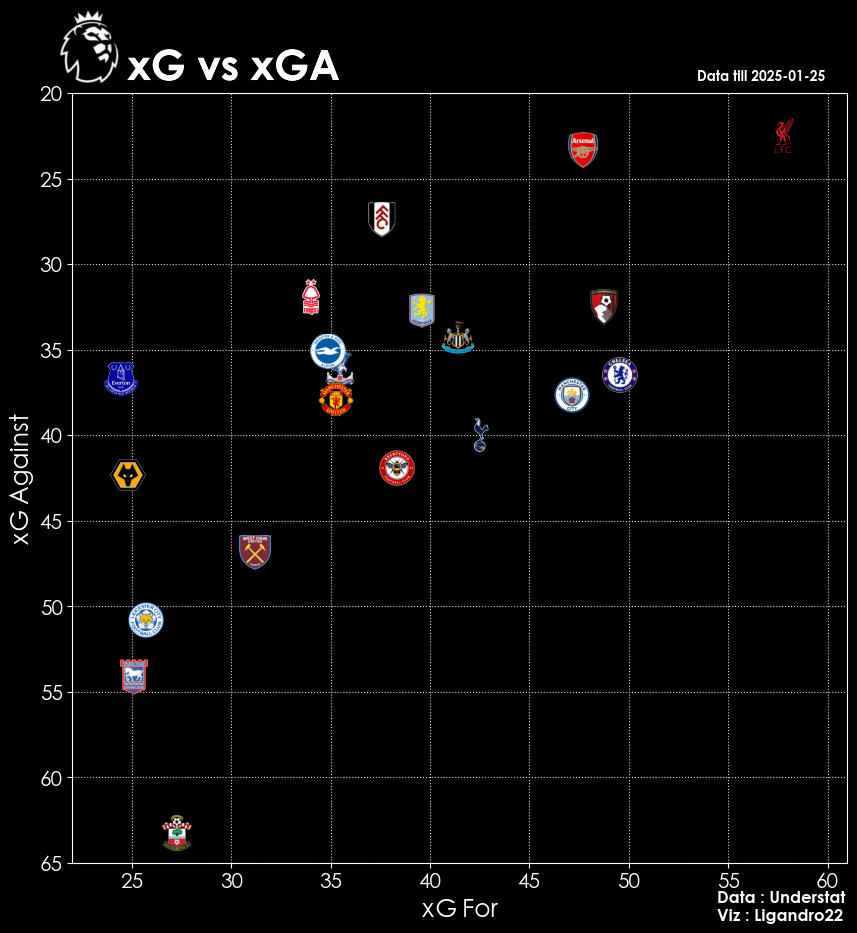

In [ ]:

fig = plt.figure(figsize=(10,10), dpi=100)
ax = plt.subplot()



fig.set_facecolor('black')
ax.patch.set_facecolor('black')


y_min = math.floor(final["xGA"].min())-2
y_max = math.ceil(final["xGA"].max())+2
x_min = math.floor(final["xG"].min())-2
x_max = math.ceil(final["xG"].max())+2


ax.set_ylim(y_min,y_max)
ax.set_xlim(x_min,x_max)


# # Draw the line y=x
# ax.plot([x_max, x_min], [y_min, y_max], color='white', linestyle='--',alpha=0.7)

# Add spines
ax.spines["left"].set_color('white')   #spines removes the plot edges(border)
ax.spines["bottom"].set_color('white')
ax.spines["right"].set_color('white')   #spines removes the plot edges(border)
ax.spines["top"].set_color('white')


# Add grid and axis labels
ax.grid(True, color = "lightgrey", ls = ":") #ls = linestyle,
plt.xticks(fontname = "STXihei",color="white")
plt.yticks(fontname = "STXihei",color="white")
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')




# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

ax_size = 0.05


plt.xlabel("xG For",font ='STXihei',fontsize = 18,color="white")
plt.ylabel("xG Against",font ='STXihei',fontsize = 18,color= "white")
ax.tick_params(labelsize=15)

counter = 0
for x,y in zip(final["xG"],( y_max+y_min)-final["xGA"]):
    ax_coords = DC_to_NFC((x,y))
    image_ax = fig.add_axes(
        [ax_coords[0] - ax_size/2, ax_coords[1] - ax_size/2, ax_size/1.4, ax_size/1.4],
         fc='None'
    )
    ax_logo(clubs[counter], image_ax)
    counter += 1
ax.invert_yaxis()


fig_text(
    x = 0.18, y = .885, 
    s = 'xG vs xGA',
    va = 'bottom', ha = 'left',
    fontsize = 30,  fontname ="Century Gothic",path_effects=[path_effects.Stroke(linewidth=0.1, foreground="#BD8B00"), path_effects.Normal()],
     fontweight="bold",color="white"
)



fig.text(
        x=0.77, y=.05, s='Data : Understat\nViz : Ligandro22',
        ha='left',va='bottom',size=12
        ,fontname="Century Gothic",
        fontweight="bold",color="white"
    )


fig_text(
    x = 0.75, y = 0.89, 
    s = 'Data till ' + date,
    va = 'bottom', ha = 'left',
    fontsize = 10, fontweight="bold",fontname = "Century Gothic",color = 'white'
)


# add image
im1 = plt.imread(r"C:\Users\lolen\OneDrive\Documents\Coding\Neurotactic Essentials\Images\PREM.png")
ax_image = add_image(
          im1, fig, left=0.11, bottom=0.6, width=0.065, height=0.65
)   # these values might differ when you are plotting

plt.savefig("AFC VS ARS.jpg",dpi =500, bbox_inches='tight')
